### 1-1. 기본 MNIST(Tensorflow)

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
#1. 데이터 저장 및 변수 생성
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, 28]))
b1 = tf.Variable(tf.random_normal([28]))
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2= tf.Variable(tf.random_normal([28, 28]), name='weight2')
b2 = tf.Variable(tf.random_normal([28]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3= tf.Variable(tf.random_normal([28, nb_classes]), name='weight3')
b3 = tf.Variable(tf.random_normal([nb_classes]), name='bias3')

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [4]:
#2. hypothesis
hypothesis = tf.nn.softmax(tf.matmul(layer2, W3) + b3)

In [5]:
#3. 비용함수
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [16]:
#4. optimizer 정의
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [17]:
#5. prediction tensor 정의
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [18]:
#parameters
training_epochs = 15
batch_size = 100

In [19]:
import random, time
import matplotlib.pyplot as plt

Epoch: 0001 cost = 1.046211348 accuray = 0.800000012
Epoch: 0002 cost = 0.553165467 accuray = 0.839999974
Epoch: 0003 cost = 0.442879243 accuray = 0.889999986
Epoch: 0004 cost = 0.390797881 accuray = 0.899999976
Epoch: 0005 cost = 0.354930080 accuray = 0.939999998
Epoch: 0006 cost = 0.331254262 accuray = 0.879999995
Epoch: 0007 cost = 0.306165370 accuray = 0.939999998
Epoch: 0008 cost = 0.291594944 accuray = 0.910000026
Epoch: 0009 cost = 0.276178140 accuray = 0.920000017
Epoch: 0010 cost = 0.258114714 accuray = 0.939999998
Epoch: 0011 cost = 0.257400366 accuray = 0.899999976
Epoch: 0012 cost = 0.240179243 accuray = 0.959999979
Epoch: 0013 cost = 0.236312562 accuray = 0.860000014
Epoch: 0014 cost = 0.229609750 accuray = 0.920000017
Epoch: 0015 cost = 0.216622107 accuray = 0.970000029
Learning finished
Accuracy:  0.927
Label:  [9]
Prediction:  [9]


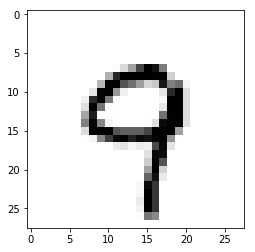

In [20]:
with tf.Session() as sess:

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # 6.학습 진행 Training cycle(15회 반복)
    for epoch in range(training_epochs):
        avg_cost = 0
        
        #number of iterations
        total_batch = int(mnist.train.num_examples / batch_size)
                
        #1epoch 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _, a = sess.run([cost, optimizer, accuracy], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost),
              'accuray =', '{:.9f}'.format(a))
        
    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))
        
    #시각화
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

기본 Softmax 함수일 때 90%정도 나왔는데 좀 더 좋아졌다.

### 1-2. 기본 MNIST(Keras)

In [22]:
#0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [23]:
#1. 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

11493376/11490434 [==============================] - 76s 7us/step


In [24]:
#2. 모델 구성하기(1. 데이터 정의 및 2. 가설 설정)
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

In [26]:
#3. 모델 학습과정 설정하기(3. cost function 4. optimizer 5. accuracy)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
#4. 모델 학습시키기(6. train)
hist = model.fit(x_train, y_train, epochs=15, batch_size=100)

Epoch 1/15
60000/60000 [==============================] - 3s 50us/step - loss: 1.0826 - acc: 0.7280
Epoch 2/15
60000/60000 [==============================] - 3s 46us/step - loss: 0.5859 - acc: 0.8666: 1s - loss: 0.
Epoch 3/15
60000/60000 [==============================] - 3s 44us/step - loss: 0.4587 - acc: 0.8901
Epoch 4/15
60000/60000 [==============================] - 3s 49us/step - loss: 0.3976 - acc: 0.9012
Epoch 5/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.3630 - acc: 0.9071
Epoch 6/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.3369 - acc: 0.9122:
Epoch 7/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.3155 - acc: 0.9172: 1s - loss: 0.31 - ETA: 0s - loss: 0.3155 - acc: 0
Epoch 8/15
60000/60000 [==============================] - 3s 50us/step - loss: 0.2999 - acc: 0.9196: 3s  - ETA: 0s - loss: 0.3001
Epoch 9/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.2865 - acc: 0.9233
Epo

In [28]:
#5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[1.0826497856775921, 0.58585745856165883, 0.45870677635073664, 0.39760554311176138, 0.36302959531545637, 0.33685566668709122, 0.31545800462365148, 0.29985681521395841, 0.28647938765585423, 0.27494910409053169, 0.26445028296361367, 0.25747810501605273, 0.24855611308167377, 0.2407173357779781, 0.23917038244505723]
[0.7280333310117324, 0.86664999971787138, 0.89005000064770379, 0.90121666848659521, 0.90711666882038111, 0.91216666907072064, 0.91715000172456107, 0.91963333507378897, 0.92325000266234081, 0.9257000018159548, 0.92883333484331765, 0.9294333339730898, 0.93148333479960754, 0.93406666974226638, 0.93511666923761372]


In [29]:
#6. 모델 평가하기(7. model evaluate)
loss_and_metircs = model.evaluate(x_test, y_test, batch_size=100)
print("## evaluation loss_and_metrics ##")
print(loss_and_metircs)

10000/10000 [==============================] - 0s 33us/step
## evaluation loss_and_metrics ##
[0.23910675685852767, 0.93630000174045558]


In [30]:
#7. 모델 평가하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print("## yhat ##")
print(yhat)

## yhat ##
[[  5.17563720e-04   1.54603142e-04   9.46832472e-04   1.01054916e-02
    8.11101199e-05   2.32238279e-04   2.86299255e-05   9.85582054e-01
    6.56548829e-04   1.69491209e-03]]


Keras 는 내가 학습률을 지정해주지 않아도 된다. 그래서 93.63% 나왔다.